# Colab Drive Mount & Directory settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/네카라쿠배/최종 프로젝트

/content/drive/MyDrive/네카라쿠배/최종 프로젝트


In [ ]:
ls

 0103프로젝트계획.txt                      '3조 프로젝트 기획안.pdf'
 0105.txt                                   code/
'~$년 1월 딥러닝 프로젝트 주제 선정.docx'   data/
'22년 1월 딥러닝 프로젝트 주제 선정.docx'  '~$ 프로젝트 기획안.docx'
'3조 프로젝트 기획안.docx'                 '~$젝트 기획안.docx'


In [ ]:
cd data/

/content/drive/MyDrive/네카라쿠배/최종 프로젝트/data


In [ ]:
ls

arena_collabo_upload.ipynb  genre_gn_all.json  test.json
arena_data/                 song_meta.json     train.json
concatenated_data.csv       songs_df.csv       val.json


# Module import


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import tqdm

# Data Load

In [ ]:
train = pd.read_json('train.json')
val = pd.read_json('val.json')
test = pd.read_json('test.json')
genre = pd.read_json('genre_gn_all.json',typ='series')
song = pd.read_json('song_meta.json')

In [ ]:
test.shape

(10740, 6)

# EDA

---

# 01 / 10

---

## song meta data

- 총 707,989개의 곡에 대한 메타데이터가 수록되어 있습니다.
- 개발 데이터와 평가 데이터에 수록된 모든 곡에 대한 메타데이터가 포함되어 있습니다.
- 필드 설명
    - _id: 곡 ID
    - album_id: 앨범 ID
    - artist_id_basket: 아티스트 ID 리스트
    - artist_name_basket: 아티스트 리스트
    - song_name: 곡 제목
    - song_gn_gnr_basket: 곡 장르 리스트
    - song_gn_dtl_gnr_basket: 곡 세부 장르 리스트
    - issue_date: 발매일

In [ ]:
song.head(5)

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [ ]:
# alnum_id 에서 결측치 4개 발견
song.isnull().sum()

song_gn_dtl_gnr_basket    0
issue_date                0
album_name                4
album_id                  0
artist_id_basket          0
song_name                 0
song_gn_gnr_basket        0
artist_name_basket        0
id                        0
dtype: int64

- album_name이 누락된 4개의 노래 정보에서 앨범 이름 검색하여 업데이트 해주기

In [ ]:
song[song['album_name'].isnull()]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
143209,"[GN0501, GN0601, GN0503, GN0606, GN0509]",20150522,None,2318271,[726168],사랑바보,"[GN0500, GN0600]",[민은서밴드],143209
291631,"[GN0105, GN0101]",20101108,None,1065178,[28772],빗속에서,[GN0100],[존박],291631
431110,"[GN0509, GN0601, GN0503, GN0606, GN0501]",20200208,None,10385717,[2203064],화면,"[GN0500, GN0600]",[Oowl Hannal (우울 한날)],431110
552088,"[GN0105, GN0601]",20101108,None,1065178,[28263],본능적으로 (Feat. Swings),"[GN0600, GN0100]",[강승윤],552088


In [ ]:
song.iloc[143209,2] = '사랑바보'
song.iloc[431110,2] = '슈퍼스타K 2 Top11 Part.3'
song.iloc[552088,2] = '슈퍼스타K2 Up To 11'

가수 '우울 한 날'의 노래 '화면'은 EP이기때문에 앨범 표시가 없다. => 노래 제목을 앨범 이름으로 매칭

In [ ]:
song.iloc[291631,2] = '화면'

In [ ]:
song.iloc[[143209,291631,431110,552088],:]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
143209,"[GN0501, GN0601, GN0503, GN0606, GN0509]",20150522,사랑바보,2318271,[726168],사랑바보,"[GN0500, GN0600]",[민은서밴드],143209
291631,"[GN0105, GN0101]",20101108,화면,1065178,[28772],빗속에서,[GN0100],[존박],291631
431110,"[GN0509, GN0601, GN0503, GN0606, GN0501]",20200208,슈퍼스타K 2 Top11 Part.3,10385717,[2203064],화면,"[GN0500, GN0600]",[Oowl Hannal (우울 한날)],431110
552088,"[GN0105, GN0601]",20101108,슈퍼스타K2 Up To 11,1065178,[28263],본능적으로 (Feat. Swings),"[GN0600, GN0100]",[강승윤],552088


In [ ]:
song.isnull().sum()

song_gn_dtl_gnr_basket    0
issue_date                0
album_name                0
album_id                  0
artist_id_basket          0
song_name                 0
song_gn_gnr_basket        0
artist_name_basket        0
id                        0
dtype: int64

### 장르 대분류, 소분류 개수 파악 (한 곡이 몇개의 장르에 매핑됐는지)

In [ ]:
gn_gnr_len = [len(x) for x in song['song_gn_gnr_basket']]
gn_dtl_gnr_len = [len(x) for x in song['song_gn_dtl_gnr_basket']]

In [ ]:
tmp = pd.DataFrame({
    'gn_gnr_len' : gn_gnr_len,
    'gn_dtl_gnr_len' : gn_dtl_gnr_len
})

tmp.head()

,gn_gnr_len,gn_dtl_gnr_len
0,1,1
1,1,2
2,1,1
3,1,2
4,1,2


In [ ]:
song = pd.concat([song,tmp], axis = 1)
song.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,gn_gnr_len,gn_dtl_gnr_len
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0,1,1
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1,1,2
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2,1,1
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3,1,2
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4,1,2


---

In [ ]:
song.gn_gnr_len.value_counts()

1    612806
2     92378
3      1694
0      1059
4        48
6         3
5         1
Name: gn_gnr_len, dtype: int64

In [ ]:
song.gn_gnr_len.value_counts()[0].sum()/song.gn_gnr_len.value_counts().sum()

0.0014957859514766472

- 장르가 없는 음원도 존재한다 -> 어떻게 취급할 것인가?

In [ ]:
song[song['gn_gnr_len'] == 0].head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,gn_gnr_len,gn_dtl_gnr_len
21,[],20200331,WHY,10410508,[417985],WHY,[],[4minute],21,0,0
399,[],20200106,뽀로로 겨울 동요,10372098,[1703695],초코 초코 핫초코,[],[아이코닉스 (ICONIX)],399,0,0
803,[],20040901,Tropical Lullaby,153435,[848353],Kalua Lullaby,[],[The Moonlighters],803,0,0
1089,[],20190924,66,10331496,[2747498],How are you,[],[유노이아 (Eunoia)],1089,0,0
2588,[],20080709,명상태교음악 `평온` Vol.4,392967,[2727],Dvorak : Humoresque No.7 Op.101,[],[Various Artists],2588,0,0


In [ ]:
song.gn_dtl_gnr_len.value_counts()

2     292539
1     218835
3     106497
4      46259
5      37238
0       4037
6       1207
7        927
8        210
10       148
9         71
11        17
12         4
Name: gn_dtl_gnr_len, dtype: int64

- 세부 장르는 없지만 대분류 장르는 있는 경우

- 주어진 장르 메타데이터와 대분류 장르가 매핑되지 않음
    - ex) GN1100과 GN9000등은 없는 장르

- 예외의 경우도 존재 
    - ex) GN0700은 '성인가요'로 있는 장르임에도 세부장르가 없기도 함
    

- 이를 토대로 메타데이터와 매핑되지 않는 곡은 따로 처리해줘야 할 듯함

In [ ]:
song[(song['gn_dtl_gnr_len'] == 0) & (song['gn_gnr_len'] != 0)]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,gn_gnr_len,gn_dtl_gnr_len
262,[],20150318,노년의 건강을 지켜주는 음악 처방전 (부제 : 휴식 때 들으면 좋은 음악친구),2309524,[726909],Bio Sound `Breathing & Big Bell`,[GN9000],[차병원],262,1,0
454,[],20191108,MAGDALENE,10349014,[788767],thousand eyes,[GN1100],[FKA Twigs],454,1,0
916,[],20170825,크리스마스의 기적,10090652,[750416],Springtime In December,[GN9000],[Larry Warren],916,1,0
1074,[],20131128,Open It Up,10008901,[1221466],Open It Up,[GN9000],[Tchengiz],1074,1,0
2061,[],20200416,주의 집에 거하는 자,10417840,[2295323],주의 집에 거하는 자 (Blessed),[GN2100],[예람워십],2061,1,0
...,...,...,...,...,...,...,...,...,...,...,...
706438,[],20191104,송가인 1st ALBUM &#39;佳人&#39;,10346934,[1701869],어머님 사랑합니다,[GN0700],[송가인],706438,1,0
706502,[],20110831,엄마와 아가와의 행복한 대화 태교음악 뉴에이지,2009854,[561734],Love Love Love,[GN9000],[해피타임뮤직],706502,1,0
706716,[],20200109,Have It All,10373946,[2762722],Have It All,[GN9000],[Renegade],706716,1,0
707201,[],20200115,모두의 MR반주 123,10376105,[770787],Into the Unknown (겨울왕국 2 OST) (Melody MR),[GN9000],[모두의MR],707201,1,0


In [ ]:
genre['GN0700']

'성인가요'

In [ ]:
cd ..

/content/drive/My Drive/네카라쿠배/최종 프로젝트


In [ ]:
cd code

/content/drive/My Drive/네카라쿠배/최종 프로젝트/code


In [ ]:
import set_matplotlib_hangul

plt.figure(figsize = (10,6))
plt.bar(x = song.gn_gnr_len.value_counts().index, height = song.gn_gnr_len.value_counts())
plt.title('곡 별 장르 매핑 개수 분포 확인')
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(x = song.gn_dtl_gnr_len.value_counts().index, height = song.gn_dtl_gnr_len.value_counts())
plt.title('곡 별 세부 장르 매핑 개수 분포 확인')
plt.show()

## genre

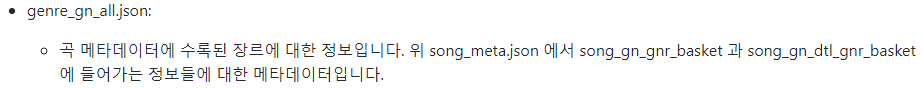

In [ ]:
len(genre)

254

In [ ]:
genre.index

Index(['GN0100', 'GN0101', 'GN0102', 'GN0103', 'GN0104', 'GN0105', 'GN0200',
       'GN0201', 'GN0202', 'GN0203',
       ...
       'GN2802', 'GN2803', 'GN2804', 'GN2805', 'GN2806', 'GN2900', 'GN2901',
       'GN2902', 'GN2903', 'GN3000'],
      dtype='object', length=254)

### 장르 대분류와 소분류 나누기 (genre1, genre2)

In [ ]:
genre1 = {}
genre2 = {}
for each in genre.index:  
    if each[-2:] == '00':
        genre1[each] = genre[each]
    else:
        genre2[each] = genre[each]

In [ ]:
len(genre1), len(genre2)

(30, 224)

- 30개의 대분류와 224개의 소분류로 나뉜다.

    - 소분류를 이용? 대분류를 이용? 둘 다 이용?

In [ ]:
genre1 = pd.DataFrame([genre1])
genre1 = genre1.T
genre1.columns = ['장르_대분류']
genre1.head()

,장르_대분류
GN0100,발라드
GN0200,댄스
GN0300,랩/힙합
GN0400,R&B/Soul
GN0500,인디음악


In [ ]:
genre2 = pd.DataFrame([genre2])
genre2 = genre2.T
genre2.columns = ['장르_대분류']
genre2.head()

,장르_대분류
GN0101,세부장르전체
GN0102,'80
GN0103,'90
GN0104,'00
GN0105,'10-


---

## train set

In [ ]:
train.shape

(115071, 6)

In [ ]:
train.sort_values(by = 'updt_date', ascending=False).head(5)

,tags,id,plylst_title,songs,like_cnt,updt_date
77496,"[서울예술대학교, 실용음악과, 실음과]",122062,서울예술대학교 실음과 뮤지션들의 음악,"[337091, 93333, 248552, 635537, 121608, 437333...",25,2020-04-23 23:59:17.000
86693,"[기분전환, 여행, 드라이브, 신나는]",134892,너랑 나랑 쟤랑,"[371783, 340540, 294071, 496880, 6223, 616782,...",2,2020-04-23 23:56:00.000
105024,[센치],38462,센치한이밤에 운치있는노래,"[160291, 513781, 695878, 210576, 525372, 69914...",0,2020-04-23 23:54:19.000
51188,"[햇살, 해질녘, 알앤비, 노을, 여름노래, 소울]",56007,6월에 날씨 같은 노래,"[8106, 340540, 589539, 574292, 184830, 27013, ...",1,2020-04-23 23:54:19.000
35719,"[힙합, 기분전환, 드라이브]",93359,기분이가 좋아지는 힙한 노래,"[13234, 142231, 162545, 288916, 686046, 57664,...",1,2020-04-23 23:53:49.000


### 플레이리스트의 정보 확인

- 한 플레이리스트에 곡이 몇개정도 들어 있는지 확인

In [ ]:
train['n_songs'] = [len(x) for x in train['songs']]
train.head(1)

,tags,id,plylst_title,songs,like_cnt,updt_date,n_songs
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,19


- 예시 플레이 리스트

In [ ]:
train.iloc[17,3]

[684998, 530279, 482241, 268506, 681473, 195524, 423503, 85040]

In [ ]:
# train df에서, 곡의 id를 따와서 song df에서 곡의 정보를 확인 (장르 확인)
tmp = song.iloc[[684998, 530279, 482241, 268506, 681473, 195524, 423503, 85040],:]
tmp.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
684998,"[GN0105, GN0101]",20100422,인사,865853,[205858],감사 (Feat. 소향),[GN0100],[이석훈],684998
530279,"[GN0105, GN0101]",20100603,잔소리,911358,[261143],잔소리 (With 2AM 슬옹),[GN0100],[아이유],530279
482241,"[GN0105, GN0101]",20110808,"Hwang Project Vol.2 - 사람, 사랑",2006984,"[6502, 1099]","사람, 사랑",[GN0100],"[김범수, 박정현]",482241
268506,"[GN0105, GN0101, GN2505, GN2503, GN1501, GN250...",20120904,응답하라 1997 Love Story Part 2,2148910,"[644871, 436700]",우리 사랑 이대로,"[GN2500, GN1500, GN0100]","[정은지, 서인국]",268506
681473,"[GN0105, GN0101]",20150430,축가 (Celebrate Love) (Made in THE VIBE),2316562,"[160080, 100176, 655051, 622112, 197910]",축가 (Celebrate Love),[GN0100],"[바이브, 포맨, 벤, 임세준, 미(MIIII)]",681473


- tmp playlist의 대표 장르 설정

- count_frequenct(df,col) 함수 작성
    - 원하는 df의 col에서 각 변수별 빈도수 계산

In [ ]:
from collections import Counter
from tqdm import tqdm

def count_frequency(df,col):
    dic_ = Counter({})
    for row in tqdm(df[col]):
        dic_ += Counter(row)
    
    new_df = pd.DataFrame(dic_,index=[0]).transpose().reset_index()
    new_df.columns = [col+'_name','count']
    new_df = new_df.sort_values('count',ascending=False)
    
    return new_df

In [ ]:
tmp_genre_df = count_frequency(tmp,'song_gn_gnr_basket')
tmp_genre_df

100%|██████████| 8/8 [00:00<00:00, 3946.19it/s]


,song_gn_gnr_basket_name,count
0,GN0100,6
1,GN2500,2
2,GN1500,1
3,GN0300,1
4,GN0200,1


- 태그가 어느정도 겹치는가 확인

- 만약 태그들이 서로 겹치지 않는다면?

In [ ]:
tags_df = count_frequency(train,'tags')

100%|██████████| 115071/115071 [03:50<00:00, 499.73it/s]


In [ ]:
tags_df

,tags_name,count
21,기분전환,16465
67,감성,11417
110,휴식,11215
122,발라드,10796
4,잔잔한,10218
...,...,...
15357,섹시한분위기,1
15356,퓨젼재즈,1
15355,ThankYouLord,1
15354,드렁크타이거,1


In [ ]:
tags_df[tags_df.tags_name == '']

,tags_name,count
10057,honne,15


- 총 태그의 종류는 몇가지정도 되는지

In [ ]:
tags_df.shape[0]

29160

In [ ]:
tags_df[tags_df['count'] == 1].shape[0]

17431

In [ ]:
17431/29160

0.5977709190672154

- 60퍼센트의 tag가 서로 겹치지 않는 태그

### like_cnt 와 updt_date 를 이용해서 할 수 있는게 있을까?

- like_cnt가 많은 playlist : 사람들이 많이 공감한 playlist
- 많은 사람들이 무난하게 좋아할 노래가 많을 것이다.
- 특성 파악해보기

In [ ]:
train.like_cnt.value_counts()[:11]

0     10356
1     10197
2      8499
3      7463
4      6465
5      5646
6      4934
7      4189
8      3656
9      3295
10     2786
Name: like_cnt, dtype: int64

In [ ]:
np.median(train.like_cnt)

7.0

In [ ]:
np.mean(train.like_cnt)

95.19768664563617

- updt_date 변수 이용한 계절 변수 추가
    - ex) 여름 휴가철 or 연말연시 or 주요 공휴일 등등

In [ ]:
train.head(2)

,tags,id,plylst_title,songs,like_cnt,updt_date,n_songs
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,42


---

# 01 / 11

---

In [ ]:
test.shape

(10740, 6)

In [ ]:
train.shape

(115071, 7)

In [ ]:
val.shape

(23015, 6)

- train, val, test data set merge

In [ ]:
train['data'] = 'train'
val['data'] = 'val'
test['data'] = 'test'

In [ ]:
df = pd.concat([train,val,test], axis = 0)
del df['n_songs']
df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,data
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,train
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,train
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,train
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,train
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,train


In [ ]:
df.reset_index(inplace = True)
del df['index']
df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,data
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,train
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,train
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,train
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,train
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,train


In [ ]:
df.to_csv('../data/concatenated_data.csv')

In [ ]:
cd /content/drive/MyDrive/네카라쿠배/최종 프로젝트/data

/content/drive/MyDrive/네카라쿠배/최종 프로젝트/data


In [ ]:
ls

concatenated_data.csv  song_meta.json  test.json   val.json
genre_gn_all.json      songs_df.csv    train.json


In [ ]:
df = pd.read_csv('concatenated_data.csv', index_col=0)
df.tail()

,tags,id,plylst_title,songs,like_cnt,updt_date,data
148821,['추억'],137930,NaN,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000,test
148822,"['띵곡의', '우울', '분위기', '드라이브', '산책']",936,NaN,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000,test
148823,['기분전환'],110589,NaN,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000,test
148824,['여름'],2605,NaN,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000,test
148825,[],126651,NaN,"[685111, 20039, 634240, 519385, 321994, 525309...",14,2015-10-26 17:43:30.000,test


In [ ]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            148816, 148817, 148818, 148819, 148820, 148821, 148822, 148823,
            148824, 148825],
           dtype='int64', length=148826)

In [ ]:
song.index

RangeIndex(start=0, stop=707989, step=1)

- Make sparse matrix
    - 너무 많은 0과 1이 존재(14만 x 70만)
    

In [ ]:
plylst_song_mat = pd.DataFrame(index = df.index, columns=song.index)

In [ ]:
plylst_song_mat = pd.DataFrame(np.reshape([0]*(148826*707990), (148826,707990)),index = df.index, columns=song.index)

In [ ]:
import pandas as pd
import numpy as np
pd.DataFrame(np.reshape([0]*1000000000,(100000,10000)), index = range(0,100000), columns = range(0,10000))

---

## User-based Collaborative Filtering guide code

- 대용량 sparse matrix를 만들기 위한 공부
- 가이드라인 코드 뜯어보기
https://arena.kakao.com/forum/topics/227

---

In [ ]:
# arena_util.py
# -*- coding: utf-8 -*-

import io
import os
import json
import distutils.dir_util
from collections import Counter

import numpy as np


def write_json(data, fname):
    def _conv(o):
        if isinstance(o, np.int64) or isinstance(o, np.int32):
            return int(o)
        raise TypeError

    parent = os.path.dirname(fname)
    distutils.dir_util.mkpath("./arena_data/" + parent)
    with io.open("./arena_data/" + fname, "w", encoding="utf8") as f:
        json_str = json.dumps(data, ensure_ascii=False, default=_conv)
        f.write(json_str)


def load_json(fname):
    with open(fname, encoding='utf8') as f:
        json_obj = json.load(f)

    return json_obj


def debug_json(r):
    print(json.dumps(r, ensure_ascii=False, indent=4))

In [ ]:
# evaluate.py
# -*- coding: utf-8 -*-
# import fire
import numpy as np

# from arena_util import load_json


class CustomEvaluator:
    def _idcg(self, l):
        return sum((1.0 / np.log(i + 2) for i in range(l)))

    def __init__(self):
        self._idcgs = [self._idcg(i) for i in range(101)]

    def _ndcg(self, gt, rec):
        dcg = 0.0
        for i, r in enumerate(rec):
            if r in gt:
                dcg += 1.0 / np.log(i + 2)

        return dcg / self._idcgs[len(gt)]

    def _eval(self, gt_fname, rec_fname):
        gt_playlists = load_json(gt_fname)
        gt_dict = {g["id"]: g for g in gt_playlists}
        rec_playlists = load_json(rec_fname)
        
        music_ndcg = 0.0
        tag_ndcg = 0.0

        for rec in rec_playlists:
            gt = gt_dict[rec["id"]]
            music_ndcg += self._ndcg(gt["songs"], rec["songs"][:100])
            tag_ndcg += self._ndcg(gt["tags"], rec["tags"][:10])

        music_ndcg = music_ndcg / len(rec_playlists)
        tag_ndcg = tag_ndcg / len(rec_playlists)
        score = music_ndcg * 0.85 + tag_ndcg * 0.15

        return music_ndcg, tag_ndcg, score

    def evaluate(self, gt_fname, rec_fname):
        try:
            music_ndcg, tag_ndcg, score = self._eval(gt_fname, rec_fname)
            print(f"Music nDCG: {music_ndcg:.6}")
            print(f"Tag nDCG: {tag_ndcg:.6}")
            print(f"Score: {score:.6}")
        except Exception as e:
            print(e)


# if __name__ == "__main__":
#     fire.Fire(ArenaEvaluator)

In [ ]:
from collections import Counter

import numpy as np
import pandas as pd

import scipy.sparse as spr
import pickle

In [ ]:
cd /content/drive/MyDrive/네카라쿠배/최종 프로젝트/data

/content/drive/MyDrive/네카라쿠배/최종 프로젝트/data


In [ ]:
song_meta = pd.read_json("song_meta.json")
train = pd.read_json("train.json")
test = pd.read_json("val.json")

In [ ]:
train['istrain'] = 1
test['istrain'] = 0

n_train = len(train)
n_test = len(test)

# train + test
plylst = pd.concat([train, test], ignore_index=True)

# playlist id
plylst["nid"] = range(n_train + n_test)

# id <-> nid
plylst_id_nid = dict(zip(plylst["id"],plylst["nid"]))
plylst_nid_id = dict(zip(plylst["nid"],plylst["id"]))

In [ ]:
plylst_tag = plylst['tags']
tag_counter = Counter([tg for tgs in plylst_tag for tg in tgs])
tag_dict = {x: tag_counter[x] for x in tag_counter}

tag_id_tid = dict()
tag_tid_id = dict()
for i, t in enumerate(tag_dict):
    tag_id_tid[t] = i
    tag_tid_id[i] = t

n_tags = len(tag_dict)

plylst_song = plylst['songs']
song_counter = Counter([sg for sgs in plylst_song for sg in sgs])
song_dict = {x: song_counter[x] for x in song_counter}

song_id_sid = dict()
song_sid_id = dict()
for i, t in enumerate(song_dict):
    song_id_sid[t] = i
    song_sid_id[i] = t

n_songs = len(song_dict)

In [ ]:
tag_counter

In [ ]:
n_tags, n_songs

(30197, 638336)

In [ ]:
plylst['songs_id'] = plylst['songs'].map(lambda x: [song_id_sid.get(s) for s in x if song_id_sid.get(s) != None])
plylst['tags_id'] = plylst['tags'].map(lambda x: [tag_id_tid.get(t) for t in x if tag_id_tid.get(t) != None])

In [ ]:
plylst.head(8)

,tags,id,plylst_title,songs,like_cnt,updt_date,istrain,nid,songs_id,tags_id
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,1,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[0]
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,1,1,"[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3...","[1, 2]"
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,1,2,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...","[3, 4]"
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,1,3,"[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,1,4,"[127, 128, 129, 130, 131, 132, 133, 134, 135, ...",[15]
5,"[운동, 드라이브, Pop, 트로피컬하우스, 힐링, 기분전환, 2017, 팝, 트렌...",69252,2017 Pop Trend,"[418694, 222305, 96545, 135950, 304687, 457451...",435,2017-09-15 15:59:26.000,1,5,"[180, 181, 182, 183, 184, 185, 186, 187, 188, ...","[16, 17, 18, 19, 20, 21, 22, 23, 24, 25]"
6,"[짝사랑, 취향저격, 슬픔, 고백, 사랑, 이별]",45339,짝사랑..고백..사랑..이별..슬픔.. 감성을 자극하는곡들!,"[528130, 505036, 398947, 627363, 37748, 376358...",24,2016-10-24 21:30:17.000,1,6,"[210, 211, 212, 213, 214, 215, 216, 217, 218, ...","[26, 27, 28, 29, 30, 31]"
7,"[잔잔한, 추억, 회상]",36557,멍청이.. 내맘도 몰라.,"[496913, 632529, 501426, 515574, 411161, 10341...",5,2008-09-23 22:32:02.000,1,7,"[248, 249, 250, 251, 252, 253, 254, 255, 256, ...","[4, 1, 2]"


In [ ]:
plylst_use = plylst[['istrain','nid','updt_date','songs_id','tags_id']]
plylst_use.loc[:,'num_songs'] = plylst_use['songs_id'].map(len)
plylst_use.loc[:,'num_tags'] = plylst_use['tags_id'].map(len)
plylst_use = plylst_use.set_index('nid')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
plylst_use

,istrain,updt_date,songs_id,tags_id,num_songs,num_tags
nid,,,,,,
0,1,2013-12-19 18:36:19.000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[0],19,1
1,1,2014-12-02 16:19:42.000,"[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3...","[1, 2]",42,2
2,1,2017-08-28 07:09:34.000,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...","[3, 4]",28,2
3,1,2019-12-05 15:15:18.000,"[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",38,10
4,1,2011-10-25 13:54:56.000,"[127, 128, 129, 130, 131, 132, 133, 134, 135, ...",[15],53,1
...,...,...,...,...,...,...
138081,0,2015-12-17 14:06:05.000,"[5607, 1025, 9650, 543806, 1424, 7372, 2234, 2...",[4],48,1
138082,0,2020-04-16 21:35:44.000,"[638333, 244876, 108022, 420983, 20258, 595078...","[11913, 335, 3162, 455, 23086]",100,5
138083,0,2019-03-27 15:27:40.000,"[1435, 718, 2659, 2773, 1359, 8731, 696, 697, ...",[],12,0


In [ ]:
plylst_train = plylst_use.iloc[:n_train,:]
plylst_test = plylst_use.iloc[n_train:,:]

In [ ]:
# sample test
np.random.seed(33)
n_sample = 300

test = plylst_test.iloc[np.random.choice(range(n_test), n_sample, replace=False),:]

# real test
# test = plylst_test
# print(len(test))

In [ ]:
row = np.repeat(range(n_train), plylst_train['num_songs'])
col = [song for songs in plylst_train['songs_id'] for song in songs]
dat = np.repeat(1, plylst_train['num_songs'].sum())
train_songs_A = spr.csr_matrix((dat, (row, col)), shape=(n_train, n_songs))

row = np.repeat(range(n_train), plylst_train['num_tags'])
col = [tag for tags in plylst_train['tags_id'] for tag in tags]
dat = np.repeat(1, plylst_train['num_tags'].sum())
train_tags_A = spr.csr_matrix((dat, (row, col)), shape=(n_train, n_tags))

In [ ]:
plylst_train['num_songs'].sum()

5285871

In [ ]:
train_songs_A_T = train_songs_A.T.tocsr()
train_tags_A_T = train_tags_A.T.tocsr()

In [ ]:
train_songs_A.shape

(115071, 638336)

In [ ]:
train_songs_A

<115071x638336 sparse matrix of type '<class 'numpy.longlong'>'
	with 5285871 stored elements in Compressed Sparse Row format>

In [ ]:
train_tags_A.shape

(115071, 30197)

In [ ]:
print("{}".format(train_songs_A))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (1, 19)	1
  (1, 20)	1
  (1, 21)	1
  (1, 22)	1
  (1, 23)	1
  (1, 24)	1
  :	:
  (115070, 148790)	1
  (115070, 152153)	1
  (115070, 152971)	1
  (115070, 158556)	1
  (115070, 159981)	1
  (115070, 167238)	1
  (115070, 168941)	1
  (115070, 177557)	1
  (115070, 198533)	1
  (115070, 204461)	1
  (115070, 227041)	1
  (115070, 283396)	1
  (115070, 293555)	1
  (115070, 296045)	1
  (115070, 325770)	1
  (115070, 325818)	1
  (115070, 341200)	1
  (115070, 358145)	1
  (115070, 361502)	1
  (115070, 380113)	1
  (115070, 407970)	1
  (115070, 447705)	1
  (115070, 615139)	1
  (115070, 615140)	1
  (115070, 615141)	1


---

In [ ]:
from tqdm import tqdm

def rec(pids):
    tt = 1

    res = []

    for pid in pids:

        #song
        p = np.zeros((n_songs,1))
        p[test.loc[pid,'songs_id']] = 1

        val = train_songs_A.dot(p).reshape(-1)

        songs_already = test.loc[pid, "songs_id"]
        tags_already = test.loc[pid, "tags_id"]

        cand_song = train_songs_A_T.dot(val)
        cand_song_idx = cand_song.reshape(-1).argsort()[-150:][::-1]

        cand_song_idx = cand_song_idx[np.isin(cand_song_idx, songs_already) == False][:100]
        rec_song_idx = [song_sid_id[i] for i in cand_song_idx]


        #tag
        # p = np.zeros((n_tags,1))
        # p[test.loc[pid,'tags_id']] = 1

        # val = train_tags_A.dot(p).reshape(-1)

        cand_tag = train_tags_A_T.dot(val)
        cand_tag_idx = cand_tag.reshape(-1).argsort()[-15:][::-1]

        cand_tag_idx = cand_tag_idx[np.isin(cand_tag_idx, tags_already) == False][:10]
        rec_tag_idx = [tag_tid_id[i] for i in cand_tag_idx]

        res.append({
                    "id": plylst_nid_id[pid],
                    "songs": rec_song_idx,
                    "tags": rec_tag_idx
            })
    if tt % 1000 == 0:
        print(tt)

    tt += 1
    
    return res

In [ ]:
answers = rec(test.index)

In [ ]:
ls

arena_data/            genre_gn_all.json  songs_df.csv  train.json
concatenated_data.csv  song_meta.json     test.json     val.json


In [ ]:
write_json(answers, "results.json")

In [ ]:
evaluator = CustomEvaluator()
evaluator.evaluate("./val.json", "arena_data/results/results.json")

float division by zero


---